# Курсовая работа

    Целью данной курсовой работы является анализ и прогнозирование курса евро. В качестве датасета используется датасет с   ежедневным изменением курса евро с 1999 по 2022 год в различных валютах, однако для данной работы будет использоваться  курс евро  к доллару США.

In [85]:
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
datapath = "D:\Ярлыки\Доки\Курсач\eurodataset.csv"
data0 : np.ndarray = pd.read_csv(datapath)
print(data0.shape)
print(data0.info())

(6311, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6311 non-null   object 
 1   [Australian dollar ]      6311 non-null   object 
 2   [Bulgarian lev ]          5909 non-null   object 
 3   [Brazilian real ]         6043 non-null   object 
 4   [Canadian dollar ]        6311 non-null   object 
 5   [Swiss franc ]            6311 non-null   object 
 6   [Chinese yuan renminbi ]  6043 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6311 non-null   object 
 9   [Danish krone ]           6311 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6311 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6311 non-null   object 
 1

    В столбцах [US dollar] и Period/Unit отсутствующих значений нет. Все остальные столбцы для данной работы значения не    имеют. В столбце [US dollar] содержится соотношение доллара к евро,в столбце Period/Unit содержатся даты.

    Переименуем столбцы для простоты работы, отсортируем даты по возростанию и изолируем нужные нам столбцы, 

In [86]:
data0.rename(columns={'[US dollar ]': 'Euro-USD','Period\\Unit:': 'Time'},inplace=True)
data0.sort_values('Time', inplace=True)
data0.reset_index(drop=True, inplace=True)
data = data0[['Time', 'Euro-USD']]
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Time      6311 non-null   object
 1   Euro-USD  6311 non-null   object
dtypes: object(2)
memory usage: 98.7+ KB
None
         Time Euro-USD
0  1999-01-04   1.1789
1  1999-01-05   1.1790
2  1999-01-06   1.1743
3  1999-01-07   1.1632
4  1999-01-08   1.1659


    Изменим тип столбца Time на datetime и тип столбца Euro-USD на float

In [87]:
data = data[data['Euro-USD'] != '-']
data['Euro-USD'] = data['Euro-USD'].astype(float)
data['Time'] = data['Time'].str.replace('-', '/')
data['Time'] = pd.to_datetime(data['Time'])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6310
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Time      6249 non-null   datetime64[ns]
 1   Euro-USD  6249 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.5 KB
None


    Найдем минимальное и максимальное значение

In [88]:
min_value = data['Euro-USD'].min()
max_value = data['Euro-USD'].max()
print(f'Max:{max_value:.3}')
print(f'Min:{min_value:.3}')

Max:1.6
Min:0.825


    Вывдем график курса Euro-USD. По оси Y - курс Euro-USD, по оси Х - время. 

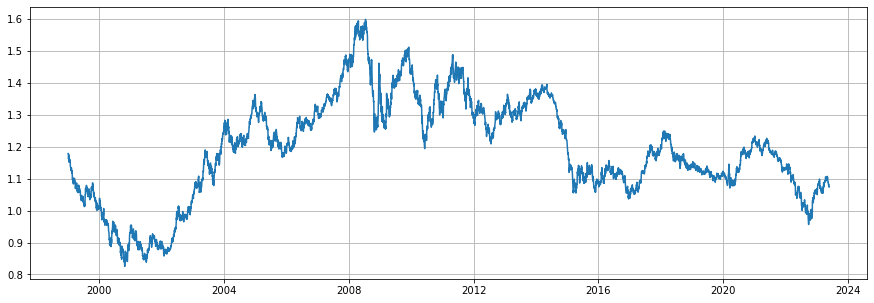

In [89]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
ax.plot(data['Time'],data['Euro-USD'])
ax.grid(visible=True)
plt.show()

    Вычислим скользящюю среднюю для данного промежутка

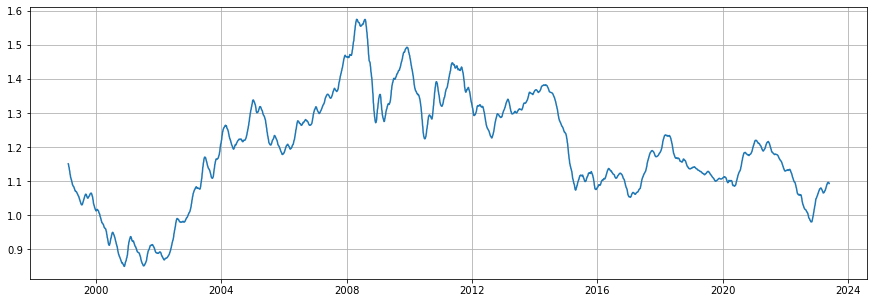

In [90]:
data['rollingmean'] = data['Euro-USD'].rolling(30).mean()
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
ax.plot(data['Time'],data['rollingmean'])
ax.grid(visible=True)
plt.show()

    Сравним курс и его скользящюю среднюю

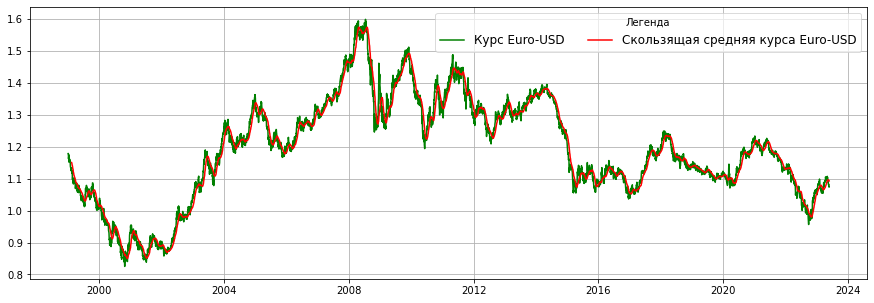

In [91]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
label1 = "Курс Euro-USD"
label2 = "Скользящая средняя курса Euro-USD"
ax.plot(data['Time'],data['Euro-USD'],color='green',label=label1)
ax.plot(data['Time'],data['rollingmean'],color='red',label=label2)
ax.legend(ncol=2, title='Легенда', framealpha=0.7, fontsize=12)
ax.grid(visible=True)
plt.show()

# Влияние COVID-19 на курс евро

    Проведем анализ на влияние COVID-19 на курс евро. Сравнивать будем период за три года до и два года после начала 
    COVID-19

    Разделим датасет на нужные промежутки

In [92]:
precovid = data.loc[(data['Time'] > '2017') & (data['Time'] < '2019-12')]
postcovid = data.loc[(data['Time'] > '2019-12') & (data['Time'] < '2022')]
periods = [precovid, postcovid]

    Сравним минимальное и максимальное значения курса до и после COVID-19

In [93]:
precovid_min = precovid['Euro-USD'].min()
precovid_max = precovid['Euro-USD'].max()
postcovid_min = postcovid['Euro-USD'].min()
postcovid_max = postcovid['Euro-USD'].max()
print(f'Precovid min:{precovid_max:.3}.', end=' ')
print(f'Precovid max:{precovid_min:.3}.')
print(f'Postcovid max:{postcovid_max:.3}.', end=' ')
print(f'Postcovid min:{postcovid_min:.3}.')

Precovid min:1.25. Precovid max:1.04.
Postcovid max:1.23. Postcovid min:1.07.


    Сравним средние значения в данных промежутках

In [94]:
precovid_mean = round(precovid['Euro-USD'].mean(), 2)
postcovid_mean = round(postcovid['Euro-USD'].mean(), 2)
print(f'Среднее значение до COVID-19: {precovid_mean}.')
print(f'Среднее значение после COVID-19: {postcovid_mean}.')

Среднее значение до COVID-19: 1.14.
Среднее значение после COVID-19: 1.16.


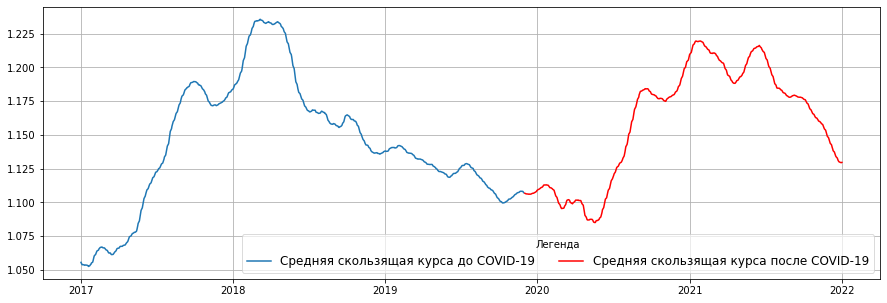

In [95]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot()
label1 = "Средняя скользящая курса до COVID-19"
label2 = "Средняя скользящая курса после COVID-19"
ax.plot(precovid['Time'],precovid['rollingmean'],label=label1)
ax.plot(postcovid['Time'],postcovid['rollingmean'],color='red',label=label2)
ax.legend(ncol=2, title='Легенда', framealpha=0.7, fontsize=12)
ax.grid(visible=True)
plt.show()

    По приведённым данным можно заметить, что COVID-19 не оказал значительного влияния на курс Euro-USD.

   # Прогнозирование с помощью ARIMA

В данной главе мы составим прогноз курса евро на 30 дней с помощью модели ARIMA

    Подключим необходимые библиотеки

In [96]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

    Выделим данные о курсе. Время будет измерятся в днях для упрощения работы с моделью

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6249 entries, 0 to 6248
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Euro-USD  6249 non-null   float64
dtypes: float64(1)
memory usage: 48.9 KB


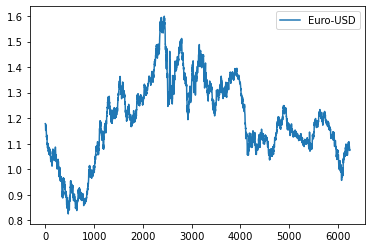

In [97]:
df = data[['Euro-USD']]
df.reset_index(drop=True, inplace=True)
df.info()
df.plot()
plt.show()

    Разделим датасет на тренировочные данные и данные для проверки прогноза. В качестве проверочных данных возьмём последние 30 дней

In [98]:
msk = (df.index < len(df)-30)
df_train = df[msk].copy()
df_test = df[~msk].copy()    

    Проведем тесты ACF(автокореляция) и PACF(частичная автокореляция). Данные тесты помогут при нстройке модели ARIMA

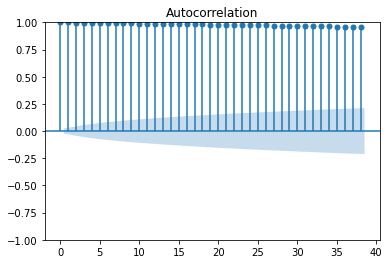

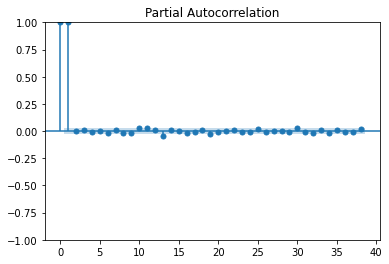

In [99]:
acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train,method='ywm')

plt.show()

    График ACF показывает, что корреляции высокие, положительные и с медленным затуханием. График PACF показывает, что 
    частичные автокорреляции имеют единичный всплеск. Оба являются признаками нестационарного временного ряда.

    Так как наш временной ряд нестационарен, то используем дифференцирование чтобы сделать его стационарным.

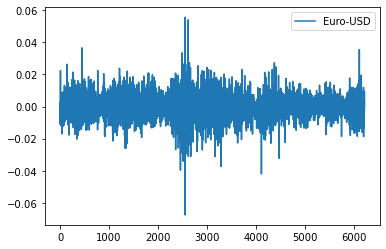

In [100]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

plt.show()

    Основываясь на результатах ACF и PACF, определим (p,d,q) для модели ARIMA. Выберем (2,1,0)

In [101]:
model = ARIMA(df_train, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Euro-USD   No. Observations:                 6219
Model:                 ARIMA(2, 1, 0)   Log Likelihood               21875.909
Date:                Tue, 12 Dec 2023   AIC                         -43745.819
Time:                        14:24:25   BIC                         -43725.613
Sample:                             0   HQIC                        -43738.815
                               - 6219                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0044      0.008     -0.528      0.597      -0.021       0.012
ar.L2         -0.0107      0.010     -1.053      0.292      -0.030       0.009
sigma2      5.148e-05   5.33e-07     96.623      0.0

    Прогноз временных рядов

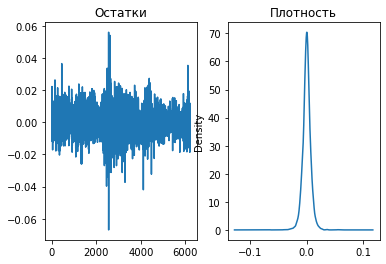

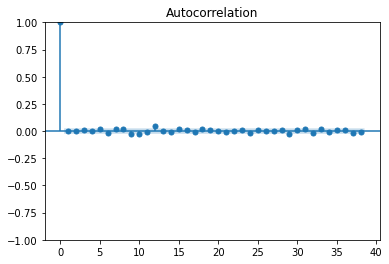

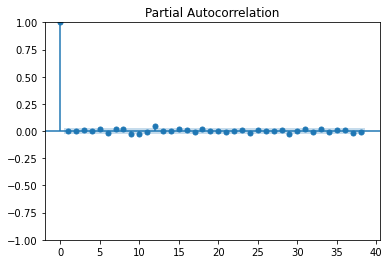

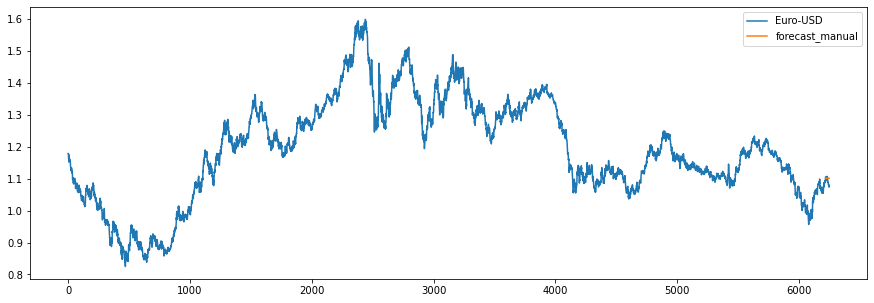

In [106]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Остатки', ax=ax[0])
residuals.plot(title='Плотность', kind='kde', ax=ax[1])
plt.show()



acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals,method='ywm')

plt.show()

forecast_test = model_fit.forecast(len(df_test))

df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)
df.plot(figsize=(15,5))
plt.show()